In [1]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis import distances as d
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt
from scipy.linalg import norm

/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
def get_TM10_RMSD(u, backbone=True): 
    # let's keep the same ref here as used in the histo analysis
    ref = mda.Universe('../../textfiles_out/TM10_RMSD/testing_RMSD/OUT.start.gro')
    if backbone:
        selection='backbone'
    else:
        selection='resid 365-395'
        
        

    R = rms.RMSD(reference = ref, 
            atomgroup = u, 
            select = selection, 
            center = True, 
            groupselections = ['resid 385-395']
           )
        
    R.run()
    rmsd = R.rmsd

        
    return rmsd[:,3]

In [3]:
def theta_of_angle(u, s1, s2, s3):
    A = u.select_atoms(s1).center_of_geometry()
    B = u.select_atoms(s2).center_of_geometry()
    C = u.select_atoms(s3).center_of_geometry()

    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)


def get_angle(u, set_name, backbone = True):
    ## preprocessing
    if backbone:
        backbone = ' and name CA'
    else:
        backbone = ''
    
    sets_sels = {'set1':['363-365', '383-385', '394-396'],\
                 'set2':['364', '384', '395'],
                 'set3':['430 and name CA', '415 and name CA', '404 and name CA']
                }
    sels = sets_sels[set_name]
    
        
    theta_u = []
    for ts in u.trajectory:
        theta = theta_of_angle(u, s1 = f'resid {sels[0]}{backbone}', 
                        s2 = f'resid {sels[1]}{backbone}', 
                        s3 = f'resid {sels[2]}{backbone}')

        theta_u.append(theta)        

    return theta_u

In [7]:
iter_start = 100
iter_end = 420
n=0

big_array = np.zeros((((iter_end-iter_start+1)*15*32),2))
big_array_index = 0
swarms_beads_nums = 15*32  #need this for proper indexing


indir = '../../../string_sims/TMD_initial_path/efflux_apo_gate_CV/efflux_BFRU_start/mntpoint'
## always add +1 because we want to include this #, but not get confused
for iteration in np.arange(iter_start, iter_end+1):
    u = mda.Universe(f'{indir}/0/0/restrained/confout.gro',\
                     f'{indir}/{iteration}/{iteration}.all_beads_swarms.xtc')



    
    #out_arr = get_angle(u,set_name='set2')
    out_arr = get_TM10_RMSD(u)
    out_arr = np.reshape(out_arr,(-1,2)) ## split into 2d array, every other element




    ### so first index from start of iteration to end
    ## then go forward by 448 & add next iter to TM10RMSD array
    big_array[big_array_index:big_array_index+swarms_beads_nums] = out_arr
    big_array_index = big_array_index + swarms_beads_nums 
    print(iteration)

/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:710: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349


In [8]:
np.save(f'../../textfiles_out/not_gates_for_MSM/efflux_testing/efflux_apo_gate_CV.TM10_angle.npy', big_array)

In [5]:
TM10_0_552=big_array

In [17]:
out = np.vstack((TM10_0_552, big_array))
np.save(f'../../textfiles_out/not_gates_for_MSM/influx_apo_gate_CV.get_TM10_RMSD.npy', out)

In [16]:
np.shape(out)

(289408, 2)

In [8]:
202944/32/14

453.0

In [35]:
u = mda.Universe('../../../string_sims/TMD_initial_path/influx_BFRU_gate_CV/md/0/0/restrained/confout.gro',\
                '../../../string_sims/TMD_initial_path/influx_BFRU_gate_CV/md/100/100.all_beads_swarms.xtc')


In [36]:
test = get_angle(u, set_name='set3')
test = np.reshape(test,(-1,2))

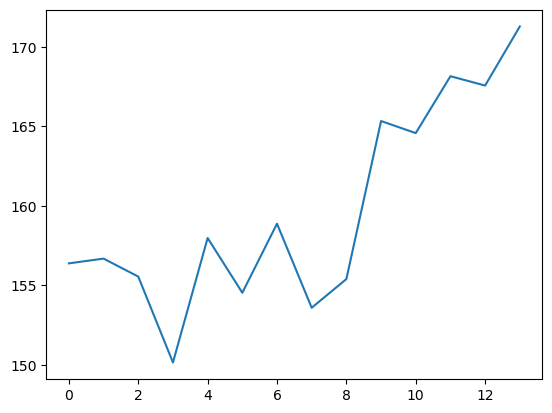

In [37]:
plt.plot(test[::32,0])

In [39]:
test[1::32,1]

array([152.32318243, 159.23895212, 155.28745865, 152.57993747,
       154.69762811, 154.41845333, 158.30469186, 153.1563817 ,
       154.4948658 , 166.86071571, 165.78791363, 168.49599228,
       167.14038449, 169.60804899])